In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [16]:
import pandas as pd
data = pd.read_csv('features.csv',usecols=['churn_yn', 'survival_time', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
data['survival_time'] = data['survival_time'].str.replace(r'\+', '', regex=True).astype('int')
data

#data=data.iloc[:500]

,churn_yn,survival_time,event_num,enterworld_num,levelup_num,spendmoney_num,itemupgrade_successrate,sessions_num
1,0.0,126,39385.0,193.0,5.0,1358.0,0.00,167.0
2,0.0,232,37423.0,176.0,19.0,907.0,0.00,152.0
3,0.0,34,33900.0,102.0,74.0,540.0,0.00,87.0
4,0.0,87,49063.0,237.0,0.0,470.0,0.00,187.0
5,1.0,18,4608.0,28.0,0.0,190.0,0.00,28.0
...,...,...,...,...,...,...,...,...
4015,1.0,23,37206.0,176.0,39.0,2114.0,0.00,176.0
4016,1.0,21,4932.0,6.0,5.0,44.0,0.00,7.0
4017,0.0,131,28439.0,122.0,106.0,934.0,0.00,123.0
4018,0.0,273,103938.0,894.0,6.0,3120.0,0.00,771.0


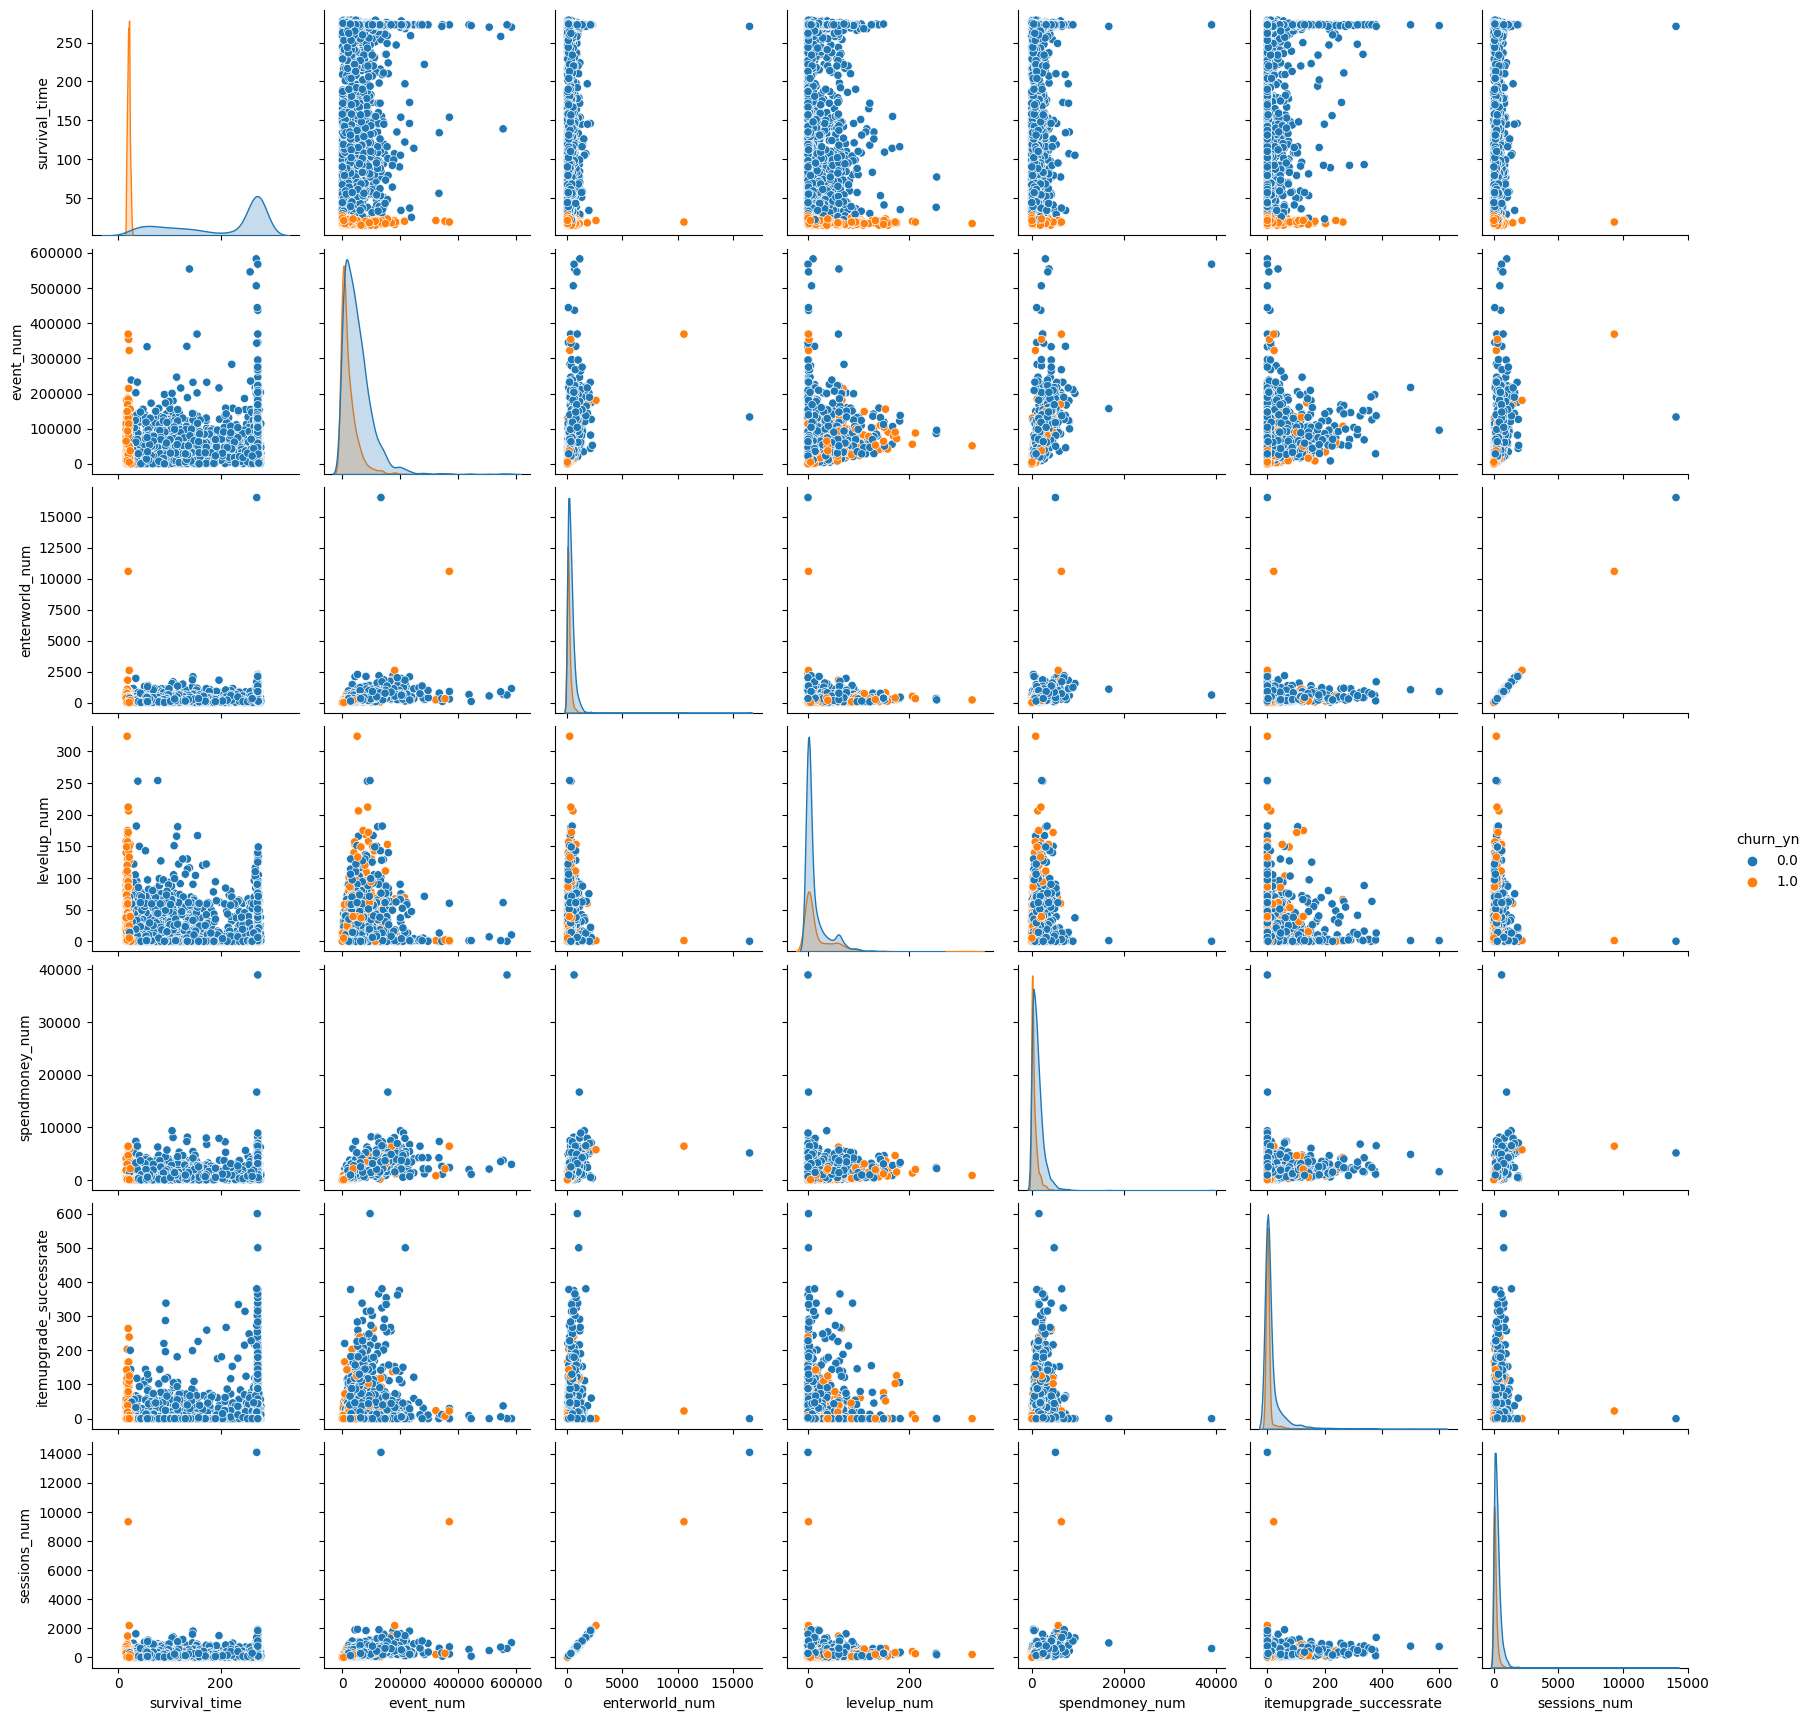

In [17]:

sns.pairplot(data=data, hue='churn_yn')
plt.show()

In [18]:
X = data.copy()
y = X.pop('churn_yn')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [20]:

DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

DecisionTreeClassifier()

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
predictions = clf.predict(X_test)
print(predictions[:5])

[1. 0. 1. 1. 1.]


In [24]:
print(accuracy_score(y_test, predictions))

0.9879396984924623
